#### Adopted from CS231n: Deep Learning for Computer Vision (Stanford)

## Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package:

In [ ]:
import numpy as np

In [ ]:
np.__version__

### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [ ]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)

In [ ]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

In [ ]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

Numpy also provides many functions to create arrays:

In [ ]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

In [ ]:
a = np.zeros((2,))
print(a)

In [ ]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

In [ ]:
c = np.full((2,2), 7.0) # Create a constant array
print(c)

In [ ]:
print(type(c))

In [ ]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

In [ ]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

### Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [ ]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

A slice of an array is a view into the same data, so modifying it will modify the original array.

In [ ]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])

You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [ ]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [ ]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

In [ ]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

In [ ]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [ ]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

In [ ]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

In [ ]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [ ]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

In [ ]:
print(a)

In [ ]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

In [ ]:
print(a[(a>1) | (a<3) ])

For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [ ]:
ls = ["Mary", 90.0, [1, 2.]]

In [ ]:
print(ls)

In [ ]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

In [ ]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

In [ ]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

In [ ]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

In [ ]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

You can also use the `@` operator which is equivalent to numpy's `dot` operator.

In [ ]:
print(v @ w)

In [ ]:
v.shape

In [ ]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

In [ ]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [ ]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [ ]:
print(x)
print("transpose\n", x.T)

In [ ]:
v = np.array([[1,2,3]])
print(v )
print("transpose\n", v.T)

### List vs. Numpy Speed

In [1]:
import numpy as np
def compute_mean(numbers):
    sum = 0

    for num in numbers:
        sum += num
    return sum/len(numbers)

In [2]:
xs = np.arange(100000)

In [3]:
%timeit compute_mean(xs.tolist())

4.96 ms ± 221 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
%timeit np.mean(xs)

81.7 µs ± 974 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Reshaping, Ravelling, & Stacking

In [5]:
import numpy as np
a1 = np.arange(1, 13)  # numbers 1 to 12
print(a1.shape)

print(a1)


(12,)
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [6]:
print(a1.reshape(3,4))

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [15]:
print(a1.reshape(6,-1))

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]


In [7]:
print(a1.reshape(-1,4))

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [8]:
print(a1.reshape(3,4).ravel())

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [9]:
a1 = np.arange(1, 13).reshape(-1,4)  # numbers 1 to 12
a2 = np.arange(13, 25).reshape(-1,4)   # numbers 1 to 12

In [10]:
joint_a = np.stack((a1,a2),axis=2)
print(joint_a.shape)
print(joint_a)

(3, 4, 2)
[[[ 1 13]
  [ 2 14]
  [ 3 15]
  [ 4 16]]

 [[ 5 17]
  [ 6 18]
  [ 7 19]
  [ 8 20]]

 [[ 9 21]
  [10 22]
  [11 23]
  [12 24]]]


In [11]:
check = (joint_a[:,:,0] == a1)
print(check)

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


In [12]:
check.sum() 

12

### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [ ]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(vv)                # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

In [ ]:
y = x + vv  # Add x and vv elementwise
print(y)

Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [ ]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [ ]:
import numpy as np

# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print(np.reshape(v, (3, 1)) * w)

In [ ]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print(x + v)

In [ ]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print((x.T + w).T)

In [ ]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

In [ ]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print(x * 2)

Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

## Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [ ]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [ ]:
%matplotlib inline

### Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

In [ ]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

In [ ]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### ChatGPT

Prompt: Write a python script to generate a line plot of sin and cosine functions with proper axis labels 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values from 0 to 2*pi with a step of 0.1
x = np.arange(0, 2*np.pi, 0.1)

# Calculate sin and cosine values for the x values
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot sin and cosine functions
plt.plot(x, y_sin, label='sin(x)')
plt.plot(x, y_cos, label='cos(x)')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of sin and cosine functions')

# Add legend
plt.legend()

# Display the plot
plt.show()


### Subplots

You can plot different things in the same figure using the subplot function. Here is an example:

In [ ]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

### ChatGPT

Write a python script to generate two subplots of sin and cosine functions with proper axis labels

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values from 0 to 2*pi with a step of 0.1
x = np.arange(0, 2*np.pi, 0.1)

# Calculate sin and cosine values for the x values
y_sin = np.sin(x)
y_cos = np.cos(x)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot sin function in the first subplot
ax1.plot(x, y_sin, label='sin(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('sin(x)')
ax1.set_title('Plot of sin function')

# Plot cosine function in the second subplot
ax2.plot(x, y_cos, label='cos(x)', color='orange')
ax2.set_xlabel('x')
ax2.set_ylabel('cos(x)')
ax2.set_title('Plot of cosine function')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

### Putting Things to Together: A Demo Linear Regression

##### Read Data 

Read data in csv format and convert to numpy array. 

https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression?resource=download

In [16]:
data = []
with open('Salary_Data.csv',mode='r') as file:
    count =0
    for line in file:
        count += 1
        if count ==1:
            continue
    
        
        _line_split = line.replace('\n','').rstrip().split(",")
        _line_split_num = [float(c) for c in _line_split]
        data.append(_line_split_num)

In [17]:
data[:10]

[[1.1, 39343.0],
 [1.3, 46205.0],
 [1.5, 37731.0],
 [2.0, 43525.0],
 [2.2, 39891.0],
 [2.9, 56642.0],
 [3.0, 60150.0],
 [3.2, 54445.0],
 [3.2, 64445.0],
 [3.7, 57189.0]]

In [20]:
import numpy as np 


data_np = np.array(data)

print(data_np.shape)

(30, 2)


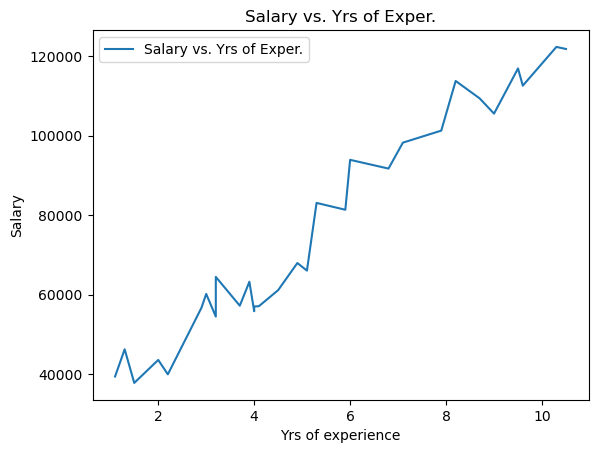

In [21]:
import matplotlib.pyplot as plt

# Plot the points using matplotlib
plt.plot(data_np[:,0],data_np[:,1])
plt.xlabel('Yrs of experience')
plt.ylabel('Salary')
plt.title('Salary vs. Yrs of Exper.')
plt.legend(['Salary vs. Yrs of Exper.'])

The line plot does not look good. Let's convert it to a scatter plot. 

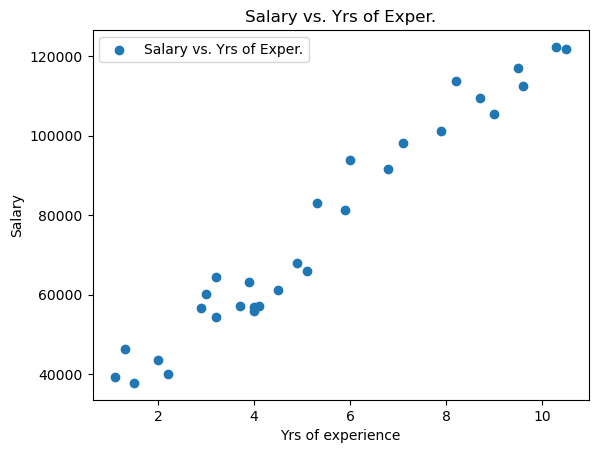

In [22]:
# Plot the points using matplotlib
plt.scatter(data_np[:,0],data_np[:,1])
plt.xlabel('Yrs of experience')
plt.ylabel('Salary')
plt.title('Salary vs. Yrs of Exper.')
plt.legend(['Salary vs. Yrs of Exper.'])

#### Linear Regression Model

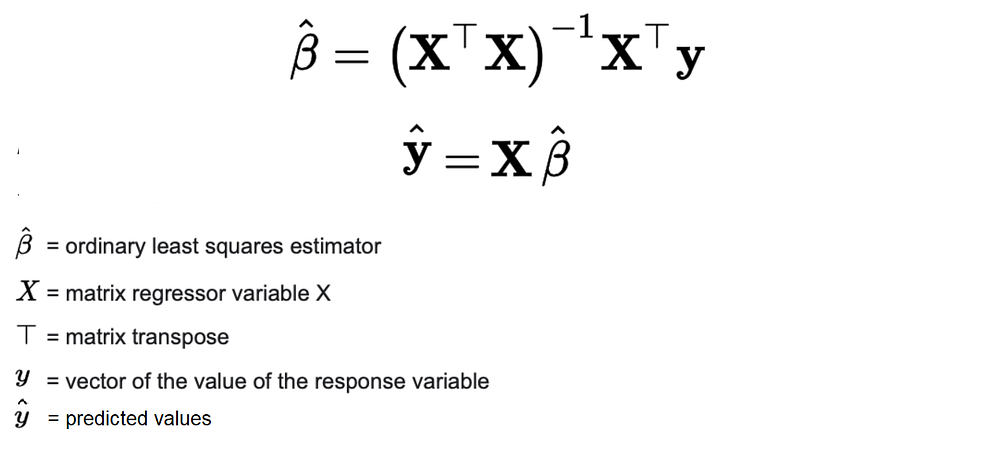

In [23]:
X= data_np[:,:1]
y= data_np[:,-1:]
print(X.shape)
print(y.shape)



(30, 1)
(30, 1)


In [24]:
X_T = X.transpose()
print(f'Shape of X_T is {X_T.shape}')
X_TX = X_T@X
print(f'Shape of X_TX is {X_TX.shape}')

from numpy.linalg import inv


X_TX_Inv =inv(X_TX)
print(f'Shape of X_TX_Inv is {X_TX_Inv.shape}')

X_TX_InvX_T = X_TX_Inv@X_T 
print(f'Shape of X_TX_InvX_T is {X_TX_InvX_T.shape}')
beta_hat = (X_TX_InvX_T @ y)
print(f'Shape of beta_hat is {beta_hat.shape}')

Shape of X_T is (1, 30)
Shape of X_TX is (1, 1)
Shape of X_TX_Inv is (1, 1)
Shape of X_TX_InvX_T is (1, 30)
Shape of beta_hat is (1, 1)


In a simple linear regression, we should expect to have two parameters - $\beta_0$ and $\beta_1$. 

In the above case, there is only one $\beta$ which is $\beta_1$.

To include $\beta_0$, we need to augment $X$ with another column with a value of 1.

In [25]:
ones = np.ones_like(X)

X_aug = np.stack((ones,X),axis=1)
print(X_aug.shape)

(30, 2, 1)


In [26]:
X_aug = X_aug.squeeze()

In [27]:
print(X_aug.shape)

(30, 2)


In [28]:
X_aug

array([[ 1. ,  1.1],
       [ 1. ,  1.3],
       [ 1. ,  1.5],
       [ 1. ,  2. ],
       [ 1. ,  2.2],
       [ 1. ,  2.9],
       [ 1. ,  3. ],
       [ 1. ,  3.2],
       [ 1. ,  3.2],
       [ 1. ,  3.7],
       [ 1. ,  3.9],
       [ 1. ,  4. ],
       [ 1. ,  4. ],
       [ 1. ,  4.1],
       [ 1. ,  4.5],
       [ 1. ,  4.9],
       [ 1. ,  5.1],
       [ 1. ,  5.3],
       [ 1. ,  5.9],
       [ 1. ,  6. ],
       [ 1. ,  6.8],
       [ 1. ,  7.1],
       [ 1. ,  7.9],
       [ 1. ,  8.2],
       [ 1. ,  8.7],
       [ 1. ,  9. ],
       [ 1. ,  9.5],
       [ 1. ,  9.6],
       [ 1. , 10.3],
       [ 1. , 10.5]])

In [29]:
X_T = X_aug.transpose()
print(f'Shape of X_T is {X_T.shape}')
X_TX = X_T@X_aug
print(f'Shape of X_TX is {X_TX.shape}')

from numpy.linalg import inv


X_TX_Inv =inv(X_TX)
print(f'Shape of X_TX_Inv is {X_TX_Inv.shape}')

X_TX_InvX_T = X_TX_Inv@X_T 
print(f'Shape of X_TX_InvX_T is {X_TX_InvX_T.shape}')
beta_hat = X_TX_InvX_T @ y
print(f'Shape of beta_hat is {beta_hat.shape}')

Shape of X_T is (2, 30)
Shape of X_TX is (2, 2)
Shape of X_TX_Inv is (2, 2)
Shape of X_TX_InvX_T is (2, 30)
Shape of beta_hat is (2, 1)


In [30]:
beta_hat

array([[25792.20019867],
       [ 9449.96232146]])

In [31]:
y_hat = X_aug @ beta_hat

print(y_hat.shape)

(30, 1)


In [32]:
y_hat = y_hat.squeeze()

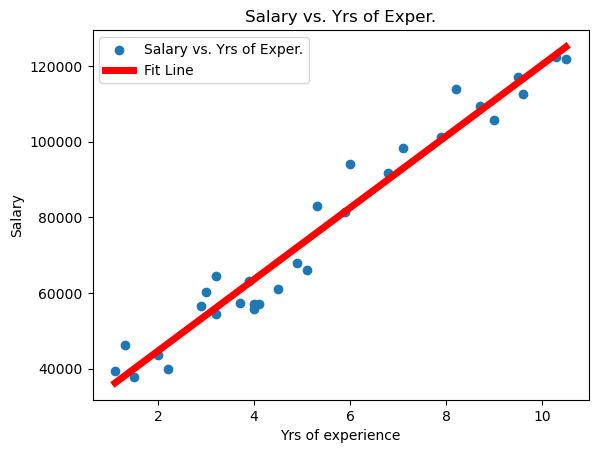

In [33]:
# Plot the points using matplotlib
plt.scatter(data_np[:,0],data_np[:,1])
plt.plot(data_np[:,0],y_hat,c='red',linewidth=5)
plt.xlabel('Yrs of experience')
plt.ylabel('Salary')
plt.title('Salary vs. Yrs of Exper.')
plt.legend(['Salary vs. Yrs of Exper.','Fit Line'])

In [5]:
mse = ((y_hat - y.squeeze())**2).mean()

print(f'mse is {mse}')

NameError: name 'y_hat' is not defined

## Advanced Usage of Numpy

### Multix-Vector Multiplication as A Linear Transformation & Projection

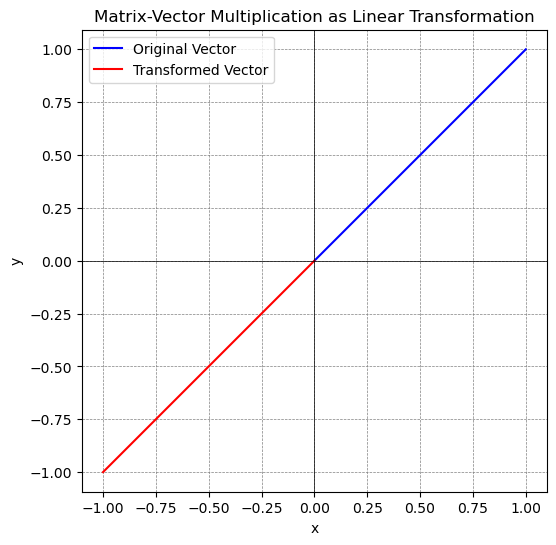

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2x2 matrix
A = np.array([[0, -1],
              [-1, 0]])
# Define a vector
v = np.array([1, 1])
# Perform matrix-vector multiplication
Av = np.dot(A, v)

# Plot the original vector
plt.figure(figsize=(6, 6))
plt.plot([0, v[0]], [0, v[1]], 'b', label='Original Vector')

# Plot the transformed vector
plt.plot([0, Av[0]], [0, Av[1]], 'r', label='Transformed Vector')

# Plot settings
plt.xlabel('x')
plt.ylabel('y')
plt.title('Matrix-Vector Multiplication as Linear Transformation')
plt.axis('equal')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()


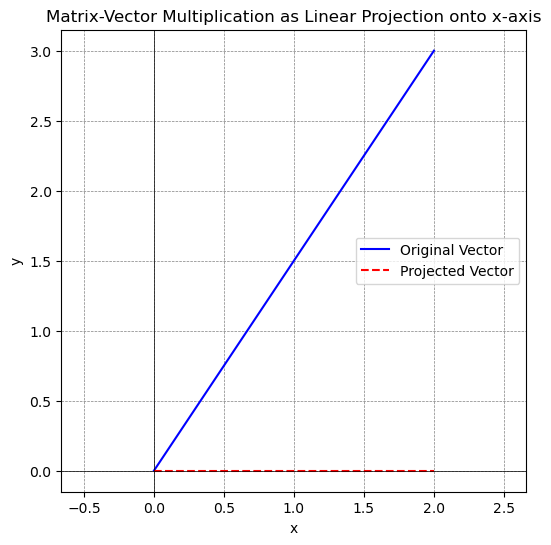

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2x2 matrix representing the projection onto the x-axis
A = np.array([[1, 0],
              [0, 0]])

# Define a vector
v = np.array([2, 3])

# Perform matrix-vector multiplication for projection
Av = np.dot(A, v)

# Plot the original vector
plt.figure(figsize=(6, 6))
plt.plot([0, v[0]], [0, v[1]], 'b', label='Original Vector')

# Plot the projected vector
plt.plot([0, Av[0]], [0, Av[1]], 'r--', label='Projected Vector')

# Plot settings
plt.xlabel('x')
plt.ylabel('y')
plt.title('Matrix-Vector Multiplication as Linear Projection onto x-axis')
plt.axis('equal')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()


### Statistical Operations

NumPy provides statistical functions such as:

sum(), min(), max()

amin(), amax(), ptp() (range of values):

nanmin(), nanmax(): ignore nan

average(): weighted average

mean(), median(), std(), var(), percentile():

naamean(), nanmedian(), nanstd(), nanvar(), nanpercentile(): ignore nan.

corrcoef() (correlation coefficient); correlate() (cross-correlation between two 1D arrays), cov() (co-variance)

histogram(), histogram2d(), histogramdd(), bincount(), digitize()

In [7]:
m1 = np.array([[11, 22, 33], [44, 55, 66]])


array([[11, 22, 33],
       [44, 55, 66]])

In [8]:

m1.mean()  # All elements, using ndarray member function


38.5

In [9]:
m1.mean(axis = 0)   # Over the rows


array([27.5, 38.5, 49.5])

In [10]:

m1.mean(axis = 1)   # Over the columns


array([22., 55.])

### Linear Algebra

numpy.transpose():

numpy.trace():

numpy.eye(dim): create an identity matrix

numpy.dot(a1, a2): compute the dot product. For 1D, it is the inner product. For 2D, it is equivalent to matrix multiplication.

numpy.linalg.inv(m): compute the inverse of matrix m

numpy.linalg.eig(m): compute the eigenvalues and right eigenvectors of square matrix m.

numpy.linalg.solve(a, b): Solving system of linear equations ax = b.


In [11]:
# Solving system of linear equations ax = b
a = np.array([[1, 3, -2], [3, 5, 6], [2, 4, 3]])

b = np.array([[5], [7], [8]])



In [13]:
x = np.linalg.solve(a, b)
x

array([[-15.],
       [  8.],
       [  2.]])

In [14]:
np.dot(a, x)  # matrix multiplication ax (=b)


array([[5.],
       [7.],
       [8.]])

In [16]:
A = np.array([[0, -1],
              [-1, 0]])

Ainv = np.linalg.inv(A)
Ainv

array([[-0., -1.],
       [-1., -0.]])

In [17]:
A = np.array([[1, 0],
              [0, 0]])

Ainv = np.linalg.inv(A)
Ainv

LinAlgError: Singular matrix

### numpy.apply_along_axis(func, axis, ndarray)

In [2]:
import numpy as np

m1 = np.array([[1 , 2, 3], [4, 5, 6]])
np.apply_along_axis(np.sum, 0, m1)  # axis-0 is column-wise

array([5, 7, 9])

In [3]:
np.apply_along_axis(np.sum, 1, m1)  # axis-1 is row-wise


array([ 6, 15])

In [5]:
# Check out np.apply_along_axis()
np.apply_along_axis(lambda x: print(x, type(x)), 0, m1)


[1 4] <class 'numpy.ndarray'>
[2 5] <class 'numpy.ndarray'>
[3 6] <class 'numpy.ndarray'>


array([None, None, None], dtype=object)

In [6]:
np.apply_along_axis(lambda v: v+1, 0, m1) 

array([[2, 3, 4],
       [5, 6, 7]])

In [7]:

def range_func(v):
    return v.max()-v.min()
np.apply_along_axis(range_func, 0, m1)  # range


array([3, 3, 3])

### Vectorized Scalar Function: numpy.vectorize(func) -> func

In [16]:
# Define a scalar function
def myfunc(x):
        return x + 1
# Run the scalar function
myfunc(5)


6

In [21]:
m1 = [[11, 22, 33], [44, 55, 66]]
myfunc(m1)


TypeError: can only concatenate list (not "int") to list

In [22]:
v_myfunc = np.vectorize(myfunc)

In [23]:
v_myfunc(m1)

array([[12, 23, 34],
       [45, 56, 67]])